In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## ```1. Exploratory Data Analysis (EDA) ```

In [2]:
df = pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [4]:
# checking null values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
# dropping NULL rows
df.dropna(inplace=True)

In [6]:
# checking if categorical values are present or not
df.select_dtypes(exclude=['number'])

,key,pickup_datetime
0,52:06.0,2015-05-07 19:52:06 UTC
1,04:56.0,2009-07-17 20:04:56 UTC
2,45:00.0,2009-08-24 21:45:00 UTC
3,22:21.0,2009-06-26 08:22:21 UTC
4,47:00.0,2014-08-28 17:47:00 UTC
...,...,...
199995,49:00.0,2012-10-28 10:49:00 UTC
199996,09:00.0,2014-03-14 01:09:00 UTC
199997,42:00.0,2009-06-29 00:42:00 UTC
199998,56:25.0,2015-05-20 14:56:25 UTC


In [7]:
df = df.drop(columns=['key', 'pickup_datetime', 'Unnamed: 0'])

In [8]:
df.shape

(199999, 6)

In [9]:
x = df.drop(columns="fare_amount")
y = df["fare_amount"]

In [10]:
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1
1,-73.994355,40.728225,-73.994710,40.750325,1
2,-74.005043,40.740770,-73.962565,40.772647,1
3,-73.976124,40.790844,-73.965316,40.803349,3
4,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
y.head()

0     7.5
1     7.7
2    12.9
3     5.3
4    16.0
Name: fare_amount, dtype: float64

In [12]:
x_std = StandardScaler().fit_transform(x)

In [13]:
x_std = pd.DataFrame(x_std)
x_std

,0,1,2,3,4
0,-0.128712,0.103940,-0.112387,0.117638,-0.493902
1,-0.128235,0.102628,-0.112021,0.121627,-0.493902
2,-0.129169,0.104253,-0.109570,0.124912,-0.493902
3,-0.126641,0.110739,-0.109780,0.129431,0.949109
4,-0.122173,0.104682,-0.110372,0.123235,2.392119
...,...,...,...,...,...
199994,-0.127596,0.104071,-0.111397,0.120151,-0.493902
199995,-0.127393,0.103744,-0.112933,0.120052,-0.493902
199996,-0.127506,0.106289,-0.101672,0.113130,0.227604
199997,-0.128477,0.102269,-0.111144,0.113546,-0.493902


In [14]:
# train test split on dataset
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=44)

In [15]:
x_train

,0,1,2,3,4
43083,-0.127160,0.108933,-0.110453,0.123139,-0.493902
191720,-0.127331,0.102776,-0.111453,0.118533,0.949109
181356,-0.126857,0.105622,-0.112841,0.118969,0.227604
191515,-0.127159,0.103106,-0.110446,0.122142,-0.493902
160763,-0.125718,0.106653,-0.110078,0.122179,-0.493902
...,...,...,...,...,...
116832,-0.127804,0.103946,-0.112365,0.118854,-0.493902
184195,-0.125968,0.106596,-0.109529,0.125920,-0.493902
49723,-0.128239,0.101476,-0.111017,0.112720,-0.493902
156845,-0.124359,0.109299,-0.110238,0.123076,-0.493902


In [16]:
x_test

,0,1,2,3,4
170899,-0.125770,0.106955,-0.110881,0.121181,0.227604
20380,-0.125591,0.107438,-0.112094,0.123733,0.227604
167542,-0.117751,0.108557,-0.111408,0.122743,0.227604
51989,-0.125187,0.108578,-0.111611,0.122419,-0.493902
146667,-0.127730,0.104280,-0.110268,0.122285,-0.493902
...,...,...,...,...,...
88589,-0.127969,0.106214,-0.110488,0.122548,-0.493902
137384,-0.127167,0.106863,-0.111903,0.117573,-0.493902
90346,9.904093,-14.753548,8.637357,-16.764643,-0.493902
164534,-0.125986,0.107725,-0.108507,0.125213,-0.493902


## ```2. Multiple Linear Regression```

In [17]:
from sklearn.linear_model import LinearRegression

# training mutiple linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# finding predictions
predictions = model.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

print(f"MSE for this model is: {mse}")
print(f"RMSE for this model is: {rmse}")

MSE for this model is: 94.99891707244403
RMSE for this model is: 9.746738791639183


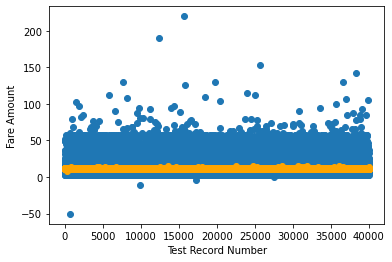

In [20]:
# plotting actual and predicted values
x_vals = [val for val in range(len(y_test))]
plt.scatter(x_vals,y_test)
plt.scatter(x_vals,predictions,color='orange')
plt.ylabel("Fare Amount")
plt.xlabel("Test Record Number")
plt.show()

## ```3. PCA Analysis```

In [21]:
# so we need first 2 principal components to capture 85-90% variance in dataset
pca = PCA()
x_pca = pca.fit_transform(x_std)
x_pca = pd.DataFrame(x_pca)
x_pca

,0,1,2,3,4
0,0.231770,-0.493800,-0.002671,-0.014679,0.000442
1,0.232726,-0.493799,-0.005765,-0.014845,-0.002293
2,0.234373,-0.493801,-0.005383,-0.016202,-0.006244
3,0.238043,0.949196,-0.001429,-0.010342,-0.012908
4,0.229556,2.392206,-0.001820,-0.007020,-0.009427
...,...,...,...,...,...
199994,0.232025,-0.493802,-0.003738,-0.014172,-0.002223
199995,0.232503,-0.493801,-0.004444,-0.013376,-0.001147
199996,0.224257,0.227691,0.005629,-0.017409,-0.004964
199997,0.228157,-0.493800,-0.001417,-0.015698,0.002781


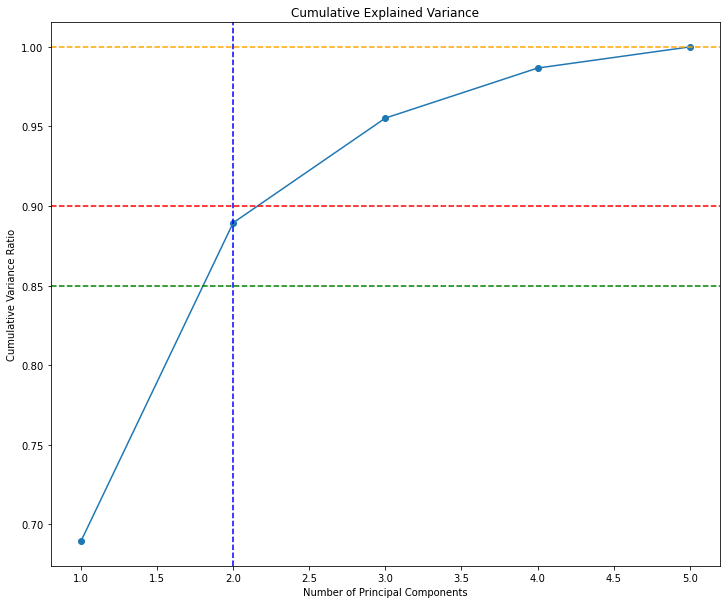

In [22]:
# Plot the cumulative explained variance
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(12,10))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axhline(y=0.85, color='green', linestyle='--')
plt.axhline(y=0.90, color='red', linestyle='--')
plt.axhline(y=1.00, color='orange', linestyle='--')
plt.axvline(x=2.00, color='blue', linestyle='--')

plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

In [23]:
x_pca = x_pca.iloc[:,:2]
x_pca

,0,1
0,0.231770,-0.493800
1,0.232726,-0.493799
2,0.234373,-0.493801
3,0.238043,0.949196
4,0.229556,2.392206
...,...,...
199994,0.232025,-0.493802
199995,0.232503,-0.493801
199996,0.224257,0.227691
199997,0.228157,-0.493800


In [24]:
num_principal_components = x_pca.shape[1]
num_principal_components

2

## ```4. Multivariate Regression with PCA```

In [25]:
# train test split on pca dataset
x_train, x_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.2,random_state=49)

In [26]:
x_train

,0,1
147339,0.233513,-0.493798
186079,0.235249,-0.493813
45515,0.231207,-0.493812
198639,0.232967,0.949203
85902,0.232190,-0.493808
...,...,...
7924,0.231817,0.949199
19638,0.234876,-0.493807
81397,0.223213,-0.493803
186029,0.233301,0.227698


In [27]:
x_test

,0,1
75162,0.232763,3.113717
196739,0.237224,-0.493811
123556,0.235376,-1.215311
26664,0.233303,-0.493806
167204,0.233202,0.227696
...,...,...
8722,0.233833,-0.493804
7693,0.233578,-0.493810
16602,0.232856,0.949200
121029,0.233221,-0.493807


In [28]:
# training multiple regression model on pca dataset
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
predictions = model.predict(x_test)

In [30]:
pca_mse = mean_squared_error(y_test,predictions)
pca_rmse = np.sqrt(pca_mse)

print(f"MSE for this model is: {pca_mse}")
print(f"RMSE for this model is: {pca_rmse}")

MSE for this model is: 98.13602963810149
RMSE for this model is: 9.90636308834385


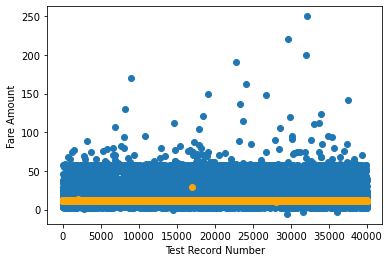

In [31]:
# plotting actual and predicted values
x_vals = [val for val in range(len(y_test))]
plt.scatter(x_vals,y_test)
plt.scatter(x_vals,predictions,color='orange')
plt.ylabel("Fare Amount")
plt.xlabel("Test Record Number")
plt.show()

## ```5. Regularization Techniques - Ridge and Lasso```

In [32]:
from sklearn.linear_model import Ridge, Lasso

In [33]:
# training ridge regression model on pca dataset
ridge = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

# predicting outcome of ridge and lasso regression
pca_ridge_predictions = ridge.predict(x_test)
pca_lasso_predictions = lasso.predict(x_test)

# finding mse and rmse for both regularizations
pca_ridge_mse = mean_squared_error(y_test, pca_ridge_predictions)
pca_ridge_rmse = np.sqrt(pca_ridge_mse)
pca_lasso_mse = mean_squared_error(y_test, pca_lasso_predictions)
pca_lasso_rmse = np.sqrt(pca_lasso_mse)

print(f"Ridge Mean Squared Error: {pca_ridge_mse}")
print(f"Ridge Root Mean Squared Error: {pca_ridge_rmse}")
print(f"Lasso Mean Squared Error: {pca_lasso_mse}")
print(f"Lasso Root Mean Squared Error: {pca_lasso_rmse}")

Ridge Mean Squared Error: 98.13602962206237
Ridge Root Mean Squared Error: 9.906363087534313
Lasso Mean Squared Error: 98.1439240396223
Lasso Root Mean Squared Error: 9.906761531379582


## ```Visualizing predictions made by Ridge and Lasso Regression on PCA Dataset```

- We can see that predictions made by both ridge and lasso regularizations are almost same

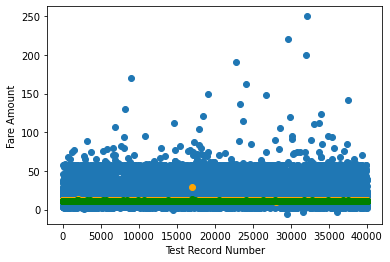

In [34]:
# plotting actual and predicted values
x_vals = [val for val in range(len(y_test))]
plt.scatter(x_vals,y_test)
plt.scatter(x_vals,pca_ridge_predictions,color='orange')
plt.scatter(x_vals,pca_lasso_predictions,color='green')
plt.ylabel("Fare Amount")
plt.xlabel("Test Record Number")
plt.show()

## ```6. Comparison and Analysis```

In [35]:
Names = ['MLR','PCA-MLR','PCA-Lasso','PCA-Ridge']
mse_vals  = [mse,pca_mse,pca_lasso_mse,pca_ridge_mse]
rmse_vals = [rmse,pca_rmse,pca_lasso_rmse,pca_ridge_rmse]

df_comparison = pd.DataFrame({"Names":Names,"MSE":mse_vals,"RMSE":rmse_vals})
df_comparison

,Names,MSE,RMSE
0,MLR,94.998917,9.746739
1,PCA-MLR,98.136030,9.906363
2,PCA-Lasso,98.143924,9.906762
3,PCA-Ridge,98.136030,9.906363


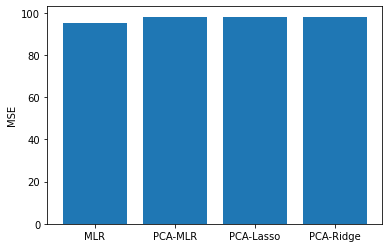

In [36]:
plt.bar(df_comparison["Names"],df_comparison["MSE"])
plt.ylabel("MSE")
plt.show()

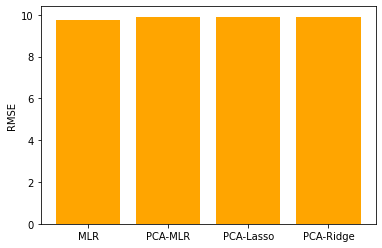

In [37]:
plt.bar(df_comparison["Names"],df_comparison["RMSE"],color='orange')
plt.ylabel("RMSE")
plt.show()

- We can see that predictive techniques with regularization and PCA have slightly higher MSE and RMSE values than normal regularization.